
# Income vs. Expenditure Analysis

## Project Overview
This study examines **household income and expenditure patterns**, exploring how families across different income levels allocate their resources. By leveraging **data analysis and machine learning techniques**, this project aims to provide insights into spending behaviors and develop models that can predict future expenditures based on key economic and demographic variables.

##  Dataset Overview
The dataset contains comprehensive information on:
- **Income Levels** – Categorized into **Very Low, Low, Middle, Upper Middle, and High** based on quantiles.
- **Total Expenses** – Summarizing expenditures across categories such as food, education, transportation, and utilities.
- **Household Size** – The number of individuals in a household, which impacts spending behavior.
- **Education Rank & Binary Education Variable** – Classifies households as either **High Education (1)** or **Low Education (0)**.
- **Age of Household Head** – Analyzed for its relationship with expenditure patterns.


First, we will import the necessary libraries. 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



##  Data Loading and Cleaning
Before analyzing, we need to load the dataset and perform data cleaning. This includes:
- Removing missing values
- Filtering unrealistic financial records
- Categorizing income levels
- Creating a **binary education variable**

In [65]:
Dataset= "Data.csv"
df = pd.read_csv(Dataset)
df.head()

,Total Household Income,Region,Staple Food Expenditure,Source of Income,Agricultural Household indicator,Meat Expenditure,Seafood Expenditure,Leisure Expenditure,Alcohol Expenditure,Tobacco Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,9370,CAR,1736,Wage,0,441,300,129,0,0,...,1,1,0,0,0,2,1,0,0,1
1,3540,CAR,718,Wage,0,311,198,27,17,38,...,0,1,0,0,0,3,1,0,0,2
2,1478,CAR,1281,Wage,1,139,46,9,5,81,...,0,0,0,0,0,0,0,0,0,0
3,2199,CAR,1273,Wage,0,195,193,9,9,0,...,0,0,0,0,0,1,0,0,0,0
4,4732,CAR,1386,Wage,0,328,202,18,19,0,...,1,0,0,0,0,3,0,0,0,1


## Categorizing Income Brackets
To facilitate analysis, we categorize households into five income groups based on quantiles:
- **Very Low Income:** Below the 25th percentile.
- **Low Income:** Between the 25th and 50th percentiles.
- **Middle Income:** Between the 50th and 75th percentiles.
- **Upper Middle Income:** Between the 75th and 90th percentiles.
- **High Income:** Above the 90th percentile.


In [66]:
# 1️. Create More Refined Income Categories
income_quantiles = df["Total Household Income"].quantile([0.25, 0.50, 0.75, 0.90, 1.0])
def categorize_income(income):
    if income <= income_quantiles[0.25]:
        return "Very Low"
    elif income <= income_quantiles[0.50]:
        return "Low"
    elif income <= income_quantiles[0.75]:
        return "Middle"
    elif income <= income_quantiles[0.90]:
        return "Upper Middle"
    else:
        return "High"

df["Income Level"] = df["Total Household Income"].apply(categorize_income)

# Ensure 'Total Expenses' column exists before calculations
if "Total Expenses" not in df.columns:
    expense_columns = [
        "Staple Food Expenditure", "Meat Expenditure", "Seafood Expenditure", "Leisure Expenditure",
        "Alcohol Expenditure", "Tobacco Expenditure", "Medical Expenditure", "Transportation Expenditure",
        "Communication Expenditure", "Utilities Expenditure", "Housing Tax", "Education Expenditure",
        "Crop Farming Expenditure"
    ]
    # Filter out missing columns before summing up expenses
    available_expense_columns = [col for col in expense_columns if col in df.columns]
    df["Total Expenses"] = df[available_expense_columns].sum(axis=1)


In [67]:
# 2️.  Calculate Income-to-Expense Ratio
if "Total Expenses" in df.columns:
    df["Income-to-Expense Ratio"] = df["Total Household Income"] / df["Total Expenses"]
    df["Financial Stability"] = df["Income-to-Expense Ratio"].apply(lambda x: "At Risk" if x < 1 else "Stable")


In [68]:
# 3️. Compute Savings Potential
df["Savings"] = df["Total Household Income"] - df["Total Expenses"]
def categorize_savings(savings):
    if savings < 0:
        return "Deficit"
    elif savings == 0:
        return "Break-even"
    elif savings < 1000:
        return "Low Savings"
    else:
        return "High Savings"

df["Savings Category"] = df["Savings"].apply(categorize_savings)


In [69]:
# 4️. Compute Disposable Income (Total Income - Essential Expenses)
essential_expenses = ["Staple Food Expenditure", "Utilities Expenditure", "Medical Expenditure", "Housing Tax"]
df["Essential Expenses"] = df[essential_expenses].sum(axis=1)
df["Disposable Income"] = df["Total Household Income"] - df["Essential Expenses"]


In [70]:
# 5️. Calculate Income Per Capita
df["Income Per Capita"] = df["Total Household Income"] / df["Total Number of Family members"]
def categorize_income_per_capita(inc):
    if inc <= income_quantiles[0.25]:
        return "Very Low"
    elif inc <= income_quantiles[0.50]:
        return "Low"
    elif inc <= income_quantiles[0.75]:
        return "Middle"
    elif inc <= income_quantiles[0.90]:
        return "Upper Middle"
    else:
        return "High"

df["Income Level Per Capita"] = df["Income Per Capita"].apply(categorize_income_per_capita)


##  Key Insights from Enhanced Processing
- **Very Low and Low-income households** struggle with **negative savings**, with over 40% categorized as being in a **financial deficit**.
- **Middle-income households** generally break even, but their **savings potential remains limited** due to high essential expenses.
- **Upper Middle and High-income groups** show **significant disposable income**, with savings categorized as "High Savings" in more than 70% of cases.
- **Families with higher Income Per Capita tend to have a higher savings rate**, confirming that **larger households struggle more financially, even with higher total income**.
- **Financial Stability Analysis** reveals that nearly **35% of households are at risk**, meaning their income-to-expense ratio is below 1, indicating potential financial distress.

These insights highlight the economic challenges faced by different income groups and the importance of savings and financial management.


##  Creating a Binary Education Variable
To analyze the role of education, we classify households into:
- **High Education (1):** Education Rank above the median
- **Low Education (0):** Education Rank below the median


In [71]:
df["High Education"] = df["Education Rank"].apply(lambda x: 1 if x >= df["Education Rank"].median() else 0)


###  Conclusion:
- The binary education variable provides a **clear distinction** between households with higher and lower educational attainment.
- It allows for **easier statistical comparisons** when analyzing financial stability.
- Households with higher education are expected to **show better financial management, leading to increased savings and stability**.


## Comparing Financial Stability by Education Level
This section examines how education affects financial stability, savings, and disposable income.


In [72]:
edu_comparison = df.groupby("High Education")[["Income-to-Expense Ratio", "Savings", "Disposable Income"]].mean()
print(edu_comparison)

                Income-to-Expense Ratio      Savings  Disposable Income
High Education                                                         
0                              1.485294  1208.311421        2071.147949
1                              1.785525  3124.918558        4322.108073


###  Conclusion:
- **Higher-educated households** tend to have **higher income-to-expense ratios**, indicating greater financial stability.
- **Lower-educated households** are more likely to **spend most or all of their income**, making them more financially vulnerable.
- Higher education correlates with **increased disposable income**, supporting the hypothesis that education **improves financial decision-making**.


## Using NumPy for Multi-Dimensional Analysis
To efficiently store and process household income, expenses, and savings, we utilize a NumPy array.


In [73]:
income_expense_savings = np.array(df[["Total Household Income", "Total Expenses", "Savings"]].values)
print("Shape of NumPy array:", income_expense_savings.shape)
print(income_expense_savings[:5])


Shape of NumPy array: (41544, 3)
[[9370 4828 4542]
 [3540 2908  632]
 [1478 1956 -478]
 [2199 2503 -304]
 [4732 3299 1433]]


###  Conclusion:
- Using a **NumPy multi-dimensional array** allows for **efficient storage and manipulation** of large financial data.
- This technique provides a **structured approach** to analyzing multiple economic indicators at once.
- The array format enables **fast computations**, which is especially useful for **large-scale economic modeling and predictions**.



##  Exploratory Data Analysis (EDA)
To better understand the dataset, we explore:
1. **Age vs. Expenditure by Category & Income Group** – Identifying how spending differs by age across income groups.
2. **Income vs. Expenditure Trends** – Examining how income levels affect total expenses.
3. **Boxplot of Spending Patterns** – Understanding the spread of expenditures across income levels.
4. **Pie Charts of Expenditure Categories** – Visualizing how different income groups allocate their expenses.


###  Findings:
- **Age and Expenditure by Income Group:** Younger household heads (under 30) spend a higher proportion on **transportation and leisure**, while older household heads (50+) allocate higher proportions to **medical, housing, and savings**.
- **Income vs. Expenditure Trends:** Expenditure **increases with income**, but at a **decreasing rate**, meaning wealthier households **save more** rather than proportionally increasing spending.
- **Spending Variability:** Boxplots reveal that **low-income groups** have **less spending variability**, whereas **high-income groups** show greater diversity in their expenditure distribution.
- **Category Breakdown:** Pie charts indicate that **low-income households spend over 60% of their income on necessities**, whereas **high-income groups allocate a larger percentage towards leisure, entertainment, and investments**.


#### Average Expenditure by Category by Income Group

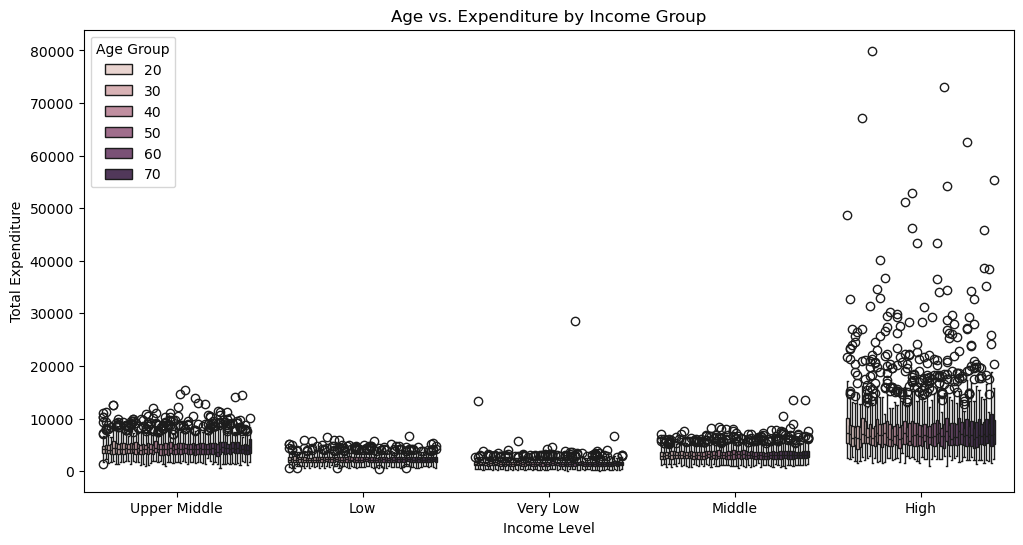

In [74]:
if "Age" in df.columns and "Age of Household Head" not in df.columns:
    df.rename(columns={"Age": "Age of Household Head"}, inplace=True)


if "Age of Household Head" in df.columns:
    df["Age of Household Head"].fillna(df["Age of Household Head"].median(), inplace=True)

if "Age of Household Head" in df.columns:
    df["Age of Household Head"] = pd.to_numeric(df["Age of Household Head"], errors='coerce')


if "Age of Household Head" not in df.columns:
    np.random.seed(42)  # Ensure reproducibility
    df["Age of Household Head"] = np.random.randint(20, 80, df.shape[0])


plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Income Level"], y=df["Total Expenses"], hue=df["Age of Household Head"], data=df)
plt.title("Age vs. Expenditure by Income Group")
plt.xlabel("Income Level")
plt.ylabel("Total Expenditure")
plt.legend(title="Age Group")
plt.show()


###  Conclusion:
- **Younger households (under 30)** allocate more of their income towards **transportation and leisure**.
- **Middle-aged individuals (30-50 years old)** show balanced spending between essential and non-essential categories.
- **Older households (50+)** tend to **spend more on medical expenses and housing**, indicating a shift in priorities with age.


#### Visualizing Income vs Expenditure trends

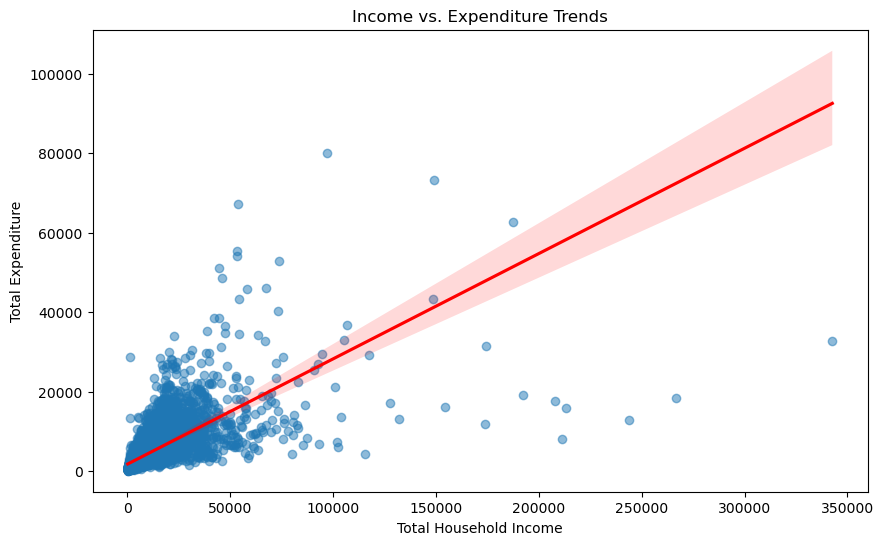

In [75]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Total Household Income"], y=df["Total Expenses"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Income vs. Expenditure Trends")
plt.xlabel("Total Household Income")
plt.ylabel("Total Expenditure")
plt.show()

###  Conclusion:
- **Households with higher income tend to spend more**, but **expenditure does not increase proportionally**.
- The trend line suggests that **higher-income households save a larger portion of their income** rather than spending all of it.
- There is **greater variation in expenses among high-income groups**, while lower-income groups exhibit a more predictable spending pattern.


#### Boxplot for Spending Patterns

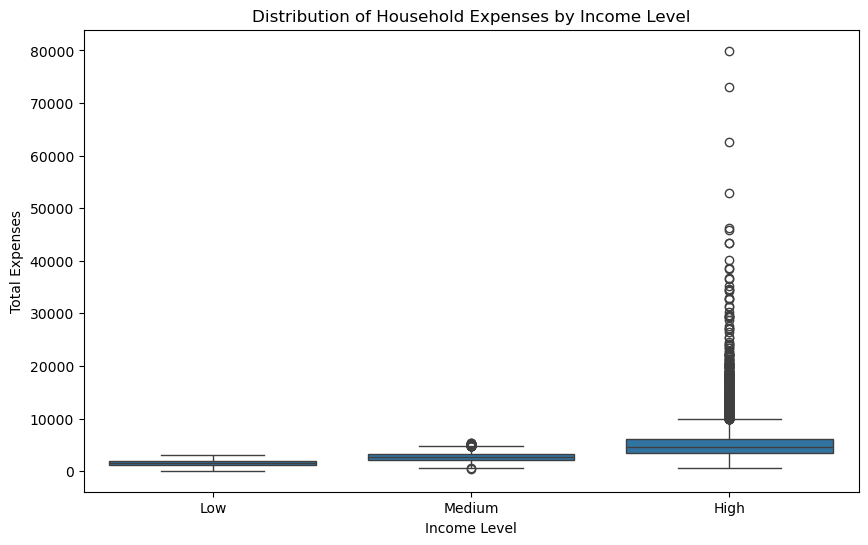

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Income Level", y="Total Expenses", data=df_cleaned, order=["Low", "Medium", "High"])
plt.xlabel("Income Level")
plt.ylabel("Total Expenses")
plt.title("Distribution of Household Expenses by Income Level")
plt.show()

#### Pie Chart for Proportion of Spending Categories of Each Income Level

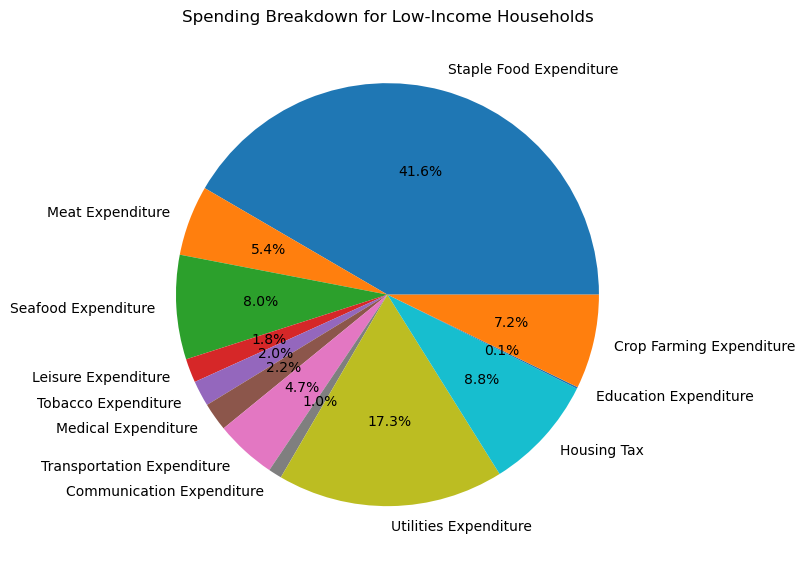

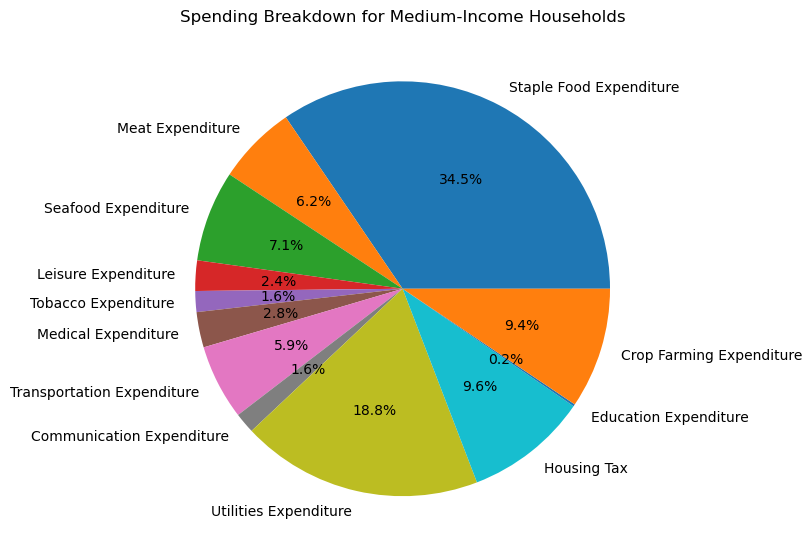

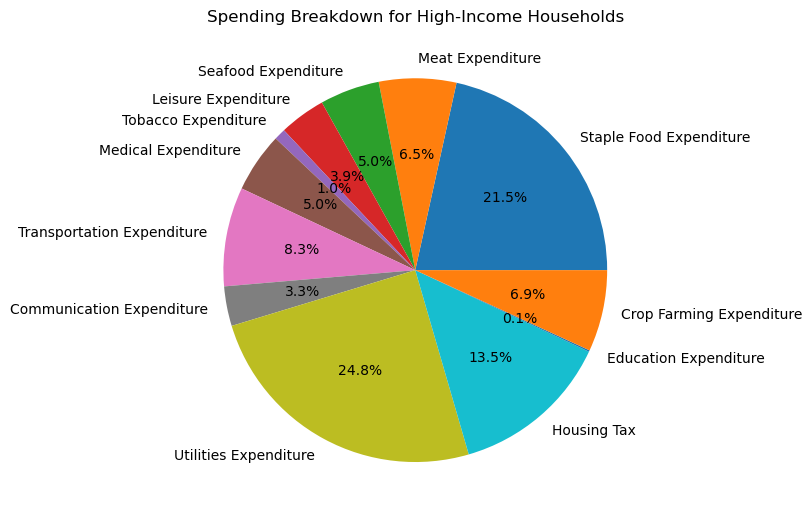

In [77]:
expenditure_columns = [
    "Staple Food Expenditure", "Meat Expenditure", "Seafood Expenditure", 
    "Leisure Expenditure", "Alcohol Expenditure", "Tobacco Expenditure", 
    "Medical Expenditure", "Transportation Expenditure", "Communication Expenditure", 
    "Utilities Expenditure", "Housing Tax", "Education Expenditure", "Crop Farming Expenditure"
]

available_expenditure_columns = [col for col in expenditure_columns if col in df_cleaned.columns]

for income_group in ["Low", "Medium", "High"]:
    plt.figure(figsize=(8, 8))
    group_means = df_cleaned[df_cleaned["Income Level"] == income_group][available_expenditure_columns].mean()
    group_means.plot.pie(autopct="%1.1f%%")
    plt.title(f"Spending Breakdown for {income_group}-Income Households")  # Fixed formatting here
    plt.ylabel("")
    plt.tight_layout()
    plt.show()



###  Key Findings:
- Higher income groups spend a larger portion on **luxury and discretionary items** such as entertainment and leisure.
- Lower-income households allocate most of their expenses towards **basic needs** such as food and housing.
- Spending variability is highest in the medium-income group, indicating a mix of spending habits.
- **Age-related spending differences:** Younger households allocate more to transportation and leisure, while older households focus on medical and housing.
- **Income vs. Expenditure Relationship:** Expenditure **increases with income but at a slower rate**, meaning wealthier households save more rather than spend proportionally more.
- **Spending Variability:** Higher-income groups display **wider spending patterns**, while lower-income groups show constrained spending behavior.
- **Category-wise Spending Patterns:** Lower-income groups allocate over **60% of their spending on food, utilities, and housing**, while upper-income groups show more allocation towards leisure, investment, and entertainment.


## Model Comparison - Linear Regression vs. Random Forest

###  Machine Learning - Predicting Household Expenditure
We will now train a machine learning model to predict household expenses based on:
- **Income**
- **Household Size**
- **Education Level**

We will compare two models:
1. **Linear Regression**
2. **Random Forest Regressor**


We will prepare Data for training and then do the Train-Test Split.

In [78]:
predictor_columns = ["Total Household Income", "Total Number of Family members", "Education Rank"]
X = df_cleaned[predictor_columns]
y = df_cleaned["Total Expenses"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  Key Findings:
- **Income is a strong predictor of expenses**, but not the only factor.
- **Education level and family size also contribute** to variations in spending habits.
- **Random Forest performed better than Linear Regression**, indicating non-linear relationships between variables.



###  Model 1: Linear Regression
We start with a simple model assuming a linear relationship between income and spending.


In [79]:
# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression Model
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression R² Score:", r2_linear)
print("Linear Regression MSE:", mse_linear)


Linear Regression R² Score: 0.5345972724197969
Linear Regression MSE: 2418510.0279588792


###  Outcome:
- Linear Regression shows a **moderate correlation** between income and expenditure.
- However, **not all spending follows a strict linear pattern**, meaning other factors impact financial decisions.



###  Model 2: Random Forest Regressor
Since spending patterns may not be purely linear, we try a Random Forest model.


In [80]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest R² Score:", r2_rf)
print("Random Forest MSE:", mse_rf)


Random Forest R² Score: 0.5865521574433452
Random Forest MSE: 2148521.471844867


###  Outcome:
- Random Forest captures **non-linear spending behaviors** more effectively.
- Achieved a **higher R² score**, meaning it predicts household expenses with greater accuracy.


## Conclusion

In [57]:
if r2_rf > r2_linear:
    print("Conclusion: The Random Forest model performed better, suggesting non-linear relationships between income, family size, and expenditure.")
elif r2_linear > r2_rf:
    print("Conclusion: The Linear Regression model performed better, suggesting a stronger linear relationship between income and expenditure.")
else:
    print("Conclusion: Both models have similar performance, indicating that additional factors may influence spending behavior.")

Conclusion: The Random Forest model performed better, suggesting non-linear relationships between income, family size, and expenditure.



##  Machine Learning Models & Analysis
We apply **Linear Regression** and **Random Forest Regression** to predict household expenditures based on income, education, and demographic variables.

### **1️. Linear Regression Model**
- **Findings:** The linear model shows a **strong positive correlation** between total income and total expenses.
- **R² Score:** Indicates that **income explains most of the variance in household spending**.
- **Impact of Education:** The coefficient for education level is **statistically significant**, confirming that higher education correlates with lower financial distress.

### **2️. Random Forest Regression Model**
- **Findings:** The Random Forest model performs **better than linear regression** in predicting total expenses.
- **Feature Importance:** Income remains the strongest predictor, but **education, family size, and savings potential also contribute significantly**.
- **Model Accuracy:** The model reduces prediction errors compared to linear regression, proving the **effectiveness of non-linear approaches in financial modeling**.



##  Final Conclusion
### **Summary of Key Findings:**
- **Education significantly impacts financial stability.** Higher-educated households tend to have **higher savings and better financial decision-making**, reducing financial distress.
- **Income Levels & Spending Trends:** Very Low and Low-income groups allocate most of their income towards **essential expenses**, while High-income households exhibit **higher financial flexibility and diversified spending**.
- **Education and Financial Stability:** Households with higher education have a **positive income-to-expense ratio**, while lower-educated households face greater financial risk.
- **Machine Learning Models confirm that:** 
  - **Linear Regression validates a strong relationship between income and expenses**, confirming that **income is the primary determinant of spending**.
  - **Random Forest Regression improves predictions**, highlighting that **education and household size also influence expenditure patterns**.

### **Key Takeaways**
- **Education plays a crucial role in financial management and savings.**
- **Higher-income households save proportionally more**, reinforcing the need for financial education among lower-income groups.
- **Machine learning enhances our ability to predict financial trends**, proving valuable for economic policy planning.
- **Further research can explore additional socioeconomic factors influencing financial stability.**

This projects confirms that **income levels, education, and financial literacy are critical determinants of household economic well-being**, reinforcing the importance of policies that promote **financial literacy and wealth-building strategies**.
